In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df=pd.read_excel('company sales data.xlsx')

In [4]:
df.head()

,Order ID,Date,Retail Store,Product,Units Sold,Revenue,Cost
0,685988,2022-01-01,DMart,Juice,595,15680,6272
1,739031,2022-01-02,Future Retail,Juice,371,23800,9520
2,699885,2022-01-02,Mega Mart,Handwash,231,2250,938
3,398050,2022-01-04,Mega Mart,Juice,211,9890,3956
4,702322,2022-01-05,Supermart,Juice,301,26830,10732


In [8]:
df.shape

(525, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525 entries, 0 to 524
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order ID      525 non-null    int64         
 1   Date          525 non-null    datetime64[ns]
 2   Retail Store  525 non-null    object        
 3   Product       525 non-null    object        
 4   Units Sold    525 non-null    int64         
 5   Revenue       525 non-null    int64         
 6   Cost          525 non-null    int64         
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 28.8+ KB


In [6]:
df.describe()

,Order ID,Date,Units Sold,Revenue,Cost
count,525.000000,525,525.000000,525.000000,525.000000
mean,551338.373333,2022-07-06 17:16:48,349.695238,9415.354286,3920.019048
min,111837.000000,2022-01-01 00:00:00,100.000000,90.000000,18.000000
25%,333840.000000,2022-04-10 00:00:00,218.000000,1894.000000,847.000000
50%,553213.000000,2022-07-04 00:00:00,350.000000,4665.000000,2136.000000
75%,762128.000000,2022-10-03 00:00:00,482.000000,13518.000000,5584.000000
max,995788.000000,2022-12-31 00:00:00,600.000000,111520.000000,44608.000000
std,258222.317143,NaN,148.999137,12908.486579,5212.295700


In [7]:
df.isna().sum()

Order ID        0
Date            0
Retail Store    0
Product         0
Units Sold      0
Revenue         0
Cost            0
dtype: int64

In [9]:
df['Order ID'].nunique()

525

In [10]:
df['Date'].nunique()

283

In [11]:
df['Retail Store'].nunique()

5

In [13]:
df['Retail Store'].unique()

array(['DMart', 'Future Retail', 'Mega Mart', 'Supermart', 'JioMart'],
      dtype=object)

In [12]:
df['Product'].nunique()

6

In [15]:
df['Product'].unique()

array(['Juice', 'Handwash', 'Noodles', 'Potato Chips', 'Coffee Powder',
       'Biscuits'], dtype=object)

In [16]:
df['Units Sold'].nunique()

322

In [17]:
df['Revenue'].nunique()

503

In [18]:
df['Cost'].nunique()

490

In [23]:
df.groupby('Retail Store')['Revenue'].sum()

Retail Store
DMart             430025
Future Retail    1510469
JioMart          1093463
Mega Mart        1088702
Supermart         820402
Name: Revenue, dtype: int64

<Axes: ylabel='Revenue'>

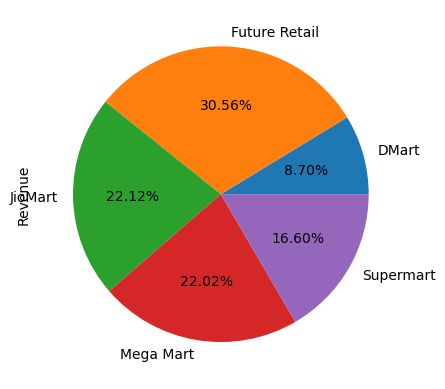

In [30]:
df.groupby('Retail Store')['Revenue'].sum().plot(kind='pie',autopct='%.2f%%')

<Axes: ylabel='Revenue'>

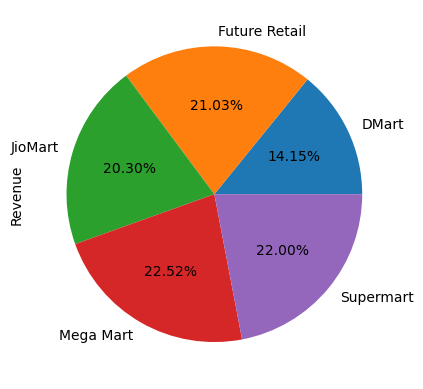

In [31]:
df.groupby('Retail Store')['Revenue'].mean().plot(kind='pie',autopct='%.2f%%')

<Axes: ylabel='Units Sold'>

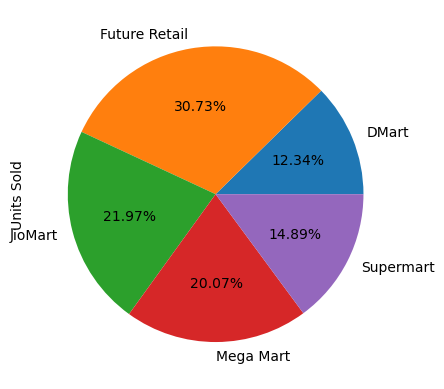

In [32]:
df.groupby('Retail Store')['Units Sold'].sum().plot(kind='pie',autopct='%.2f%%')

<Axes: ylabel='Units Sold'>

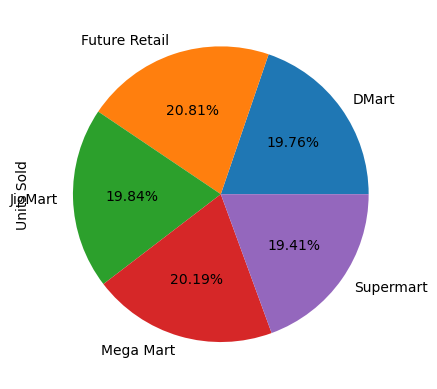

In [33]:
df.groupby('Retail Store')['Units Sold'].mean().plot(kind='pie',autopct='%.2f%%')

<Axes: ylabel='Cost'>

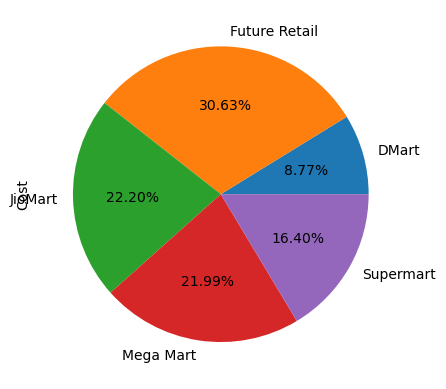

In [35]:
df.groupby('Retail Store')['Cost'].sum().plot(kind='pie',autopct='%.2f%%')

<Axes: ylabel='Cost'>

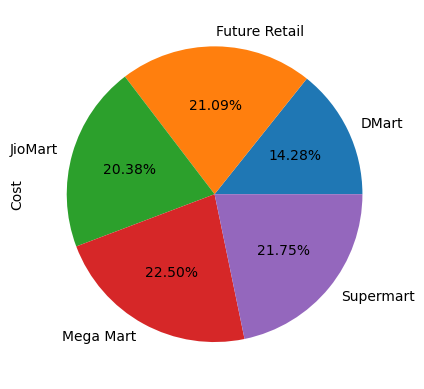

In [36]:
df.groupby('Retail Store')['Cost'].mean().plot(kind='pie',autopct='%.2f%%')

<Axes: ylabel='Revenue'>

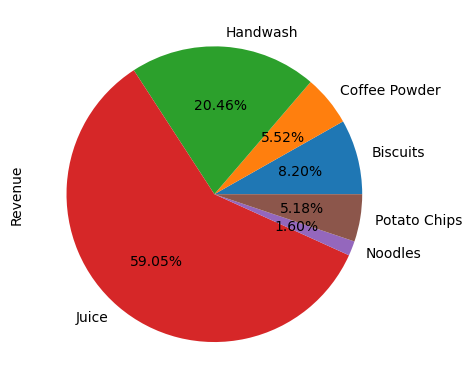

In [37]:
df.groupby('Product')['Revenue'].sum().plot(kind='pie',autopct='%.2f%%')

<Axes: ylabel='Revenue'>

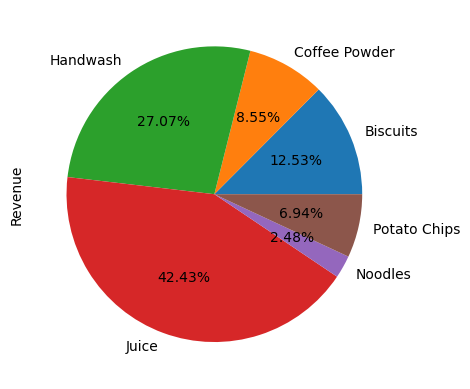

In [40]:
df.groupby('Product')['Revenue'].mean().plot(kind='pie',autopct='%.2f%%')

<Axes: ylabel='Units Sold'>

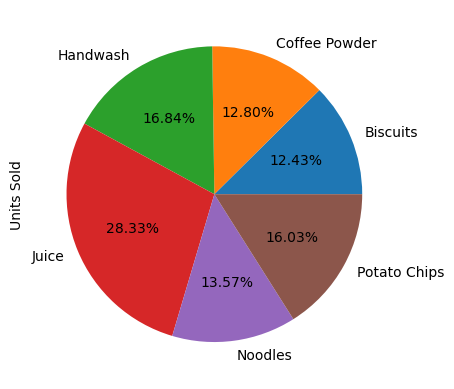

In [39]:
df.groupby('Product')['Units Sold'].sum().plot(kind='pie',autopct='%.2f%%')

<Axes: ylabel='Units Sold'>

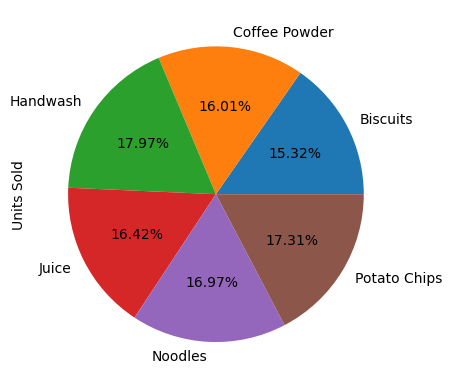

In [41]:
df.groupby('Product')['Units Sold'].mean().plot(kind='pie',autopct='%.2f%%')

<Axes: ylabel='Cost'>

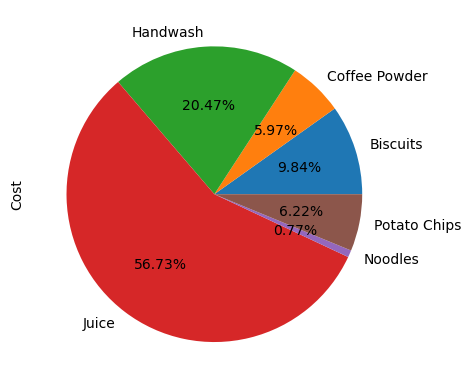

In [38]:
df.groupby('Product')['Cost'].sum().plot(kind='pie',autopct='%.2f%%')

<Axes: ylabel='Cost'>

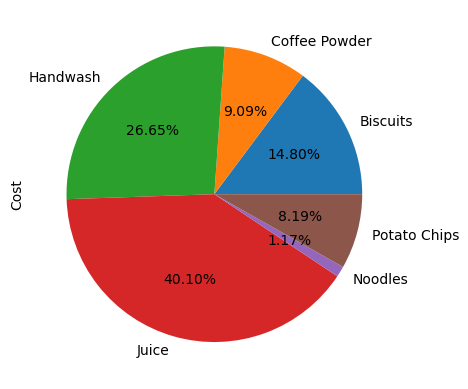

In [42]:
df.groupby('Product')['Cost'].mean().plot(kind='pie',autopct='%.2f%%')

In [48]:
print(str(df['Order ID'][0])+" , "+str(df['Date'][0]))

685988 , 2022-01-01 00:00:00


### Preparing data to insert into MySQL

In [57]:
table='sales'
for i in range(0,5):
    val1=str(df['Order ID'][i])+' , '+"'"+str(df['Date'][i]) +"'"+ ' , ' +"'"+str(df['Retail Store'][i])+"'"
    val2="'"+str(df['Product'][i])+"'"+" , "+str(df['Units Sold'][i]) + " , " +str(df['Revenue'][i])
    val=val1+' , '+val2+' , ' + str(df['Cost'][i])
    a="insert into " + table + ' values(' + val + ')'+';'
    print(a)

insert into sales values(685988 , '2022-01-01 00:00:00' , 'DMart' , 'Juice' , 595 , 15680 , 6272);
insert into sales values(739031 , '2022-01-02 00:00:00' , 'Future Retail' , 'Juice' , 371 , 23800 , 9520);
insert into sales values(699885 , '2022-01-02 00:00:00' , 'Mega Mart' , 'Handwash' , 231 , 2250 , 938);
insert into sales values(398050 , '2022-01-04 00:00:00' , 'Mega Mart' , 'Juice' , 211 , 9890 , 3956);
insert into sales values(702322 , '2022-01-05 00:00:00' , 'Supermart' , 'Juice' , 301 , 26830 , 10732);
